# PyTorch Deep Learning - Modern Recurrent Neural Network Architectures

- We will build our first recurrent neural network (RNN) using the time-machine text example. The recurrent neural network is supposed to perform a character-based predictions. 

- Before we dive into `Pytorch` and `RNNs` - here are some helpful tutorials:
    - `Introduction`: https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html, https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html
    - `Training`: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html, https://pytorch.org/tutorials/beginner/pytorch_with_examples.html, https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
    - `Datasets, Dataloaders`: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
    - `Layer`:  https://pytorch.org/docs/stable/nn.html
    - `RNN`: https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
    - `LSTM PyTorch`: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
    - `GRU PyTorch`: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html
    - `Sequence Models PyTorch`: https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
    - `Loss`: https://pytorch.org/docs/stable/nn.html#loss-functions
    - `Optimizers`: https://pytorch.org/docs/stable/optim.html
    - `RNN`: https://d2l.ai/chapter_recurrent-modern/index.html
    - `LSTM`: https://d2l.ai/chapter_recurrent-modern/lstm.html
    - `GRU`: https://d2l.ai/chapter_recurrent-modern/gru.html
    - `BACKPROPAGATION THROUGH TIME (BPTT)`: https://d2l.ai/chapter_recurrent-neural-networks/bptt.html
      
## Long-Short-Term-Memory (LSTM) Cell

- Hochreiter and Schmidhuber, Paper: https://ieeexplore.ieee.org/abstract/document/6795963

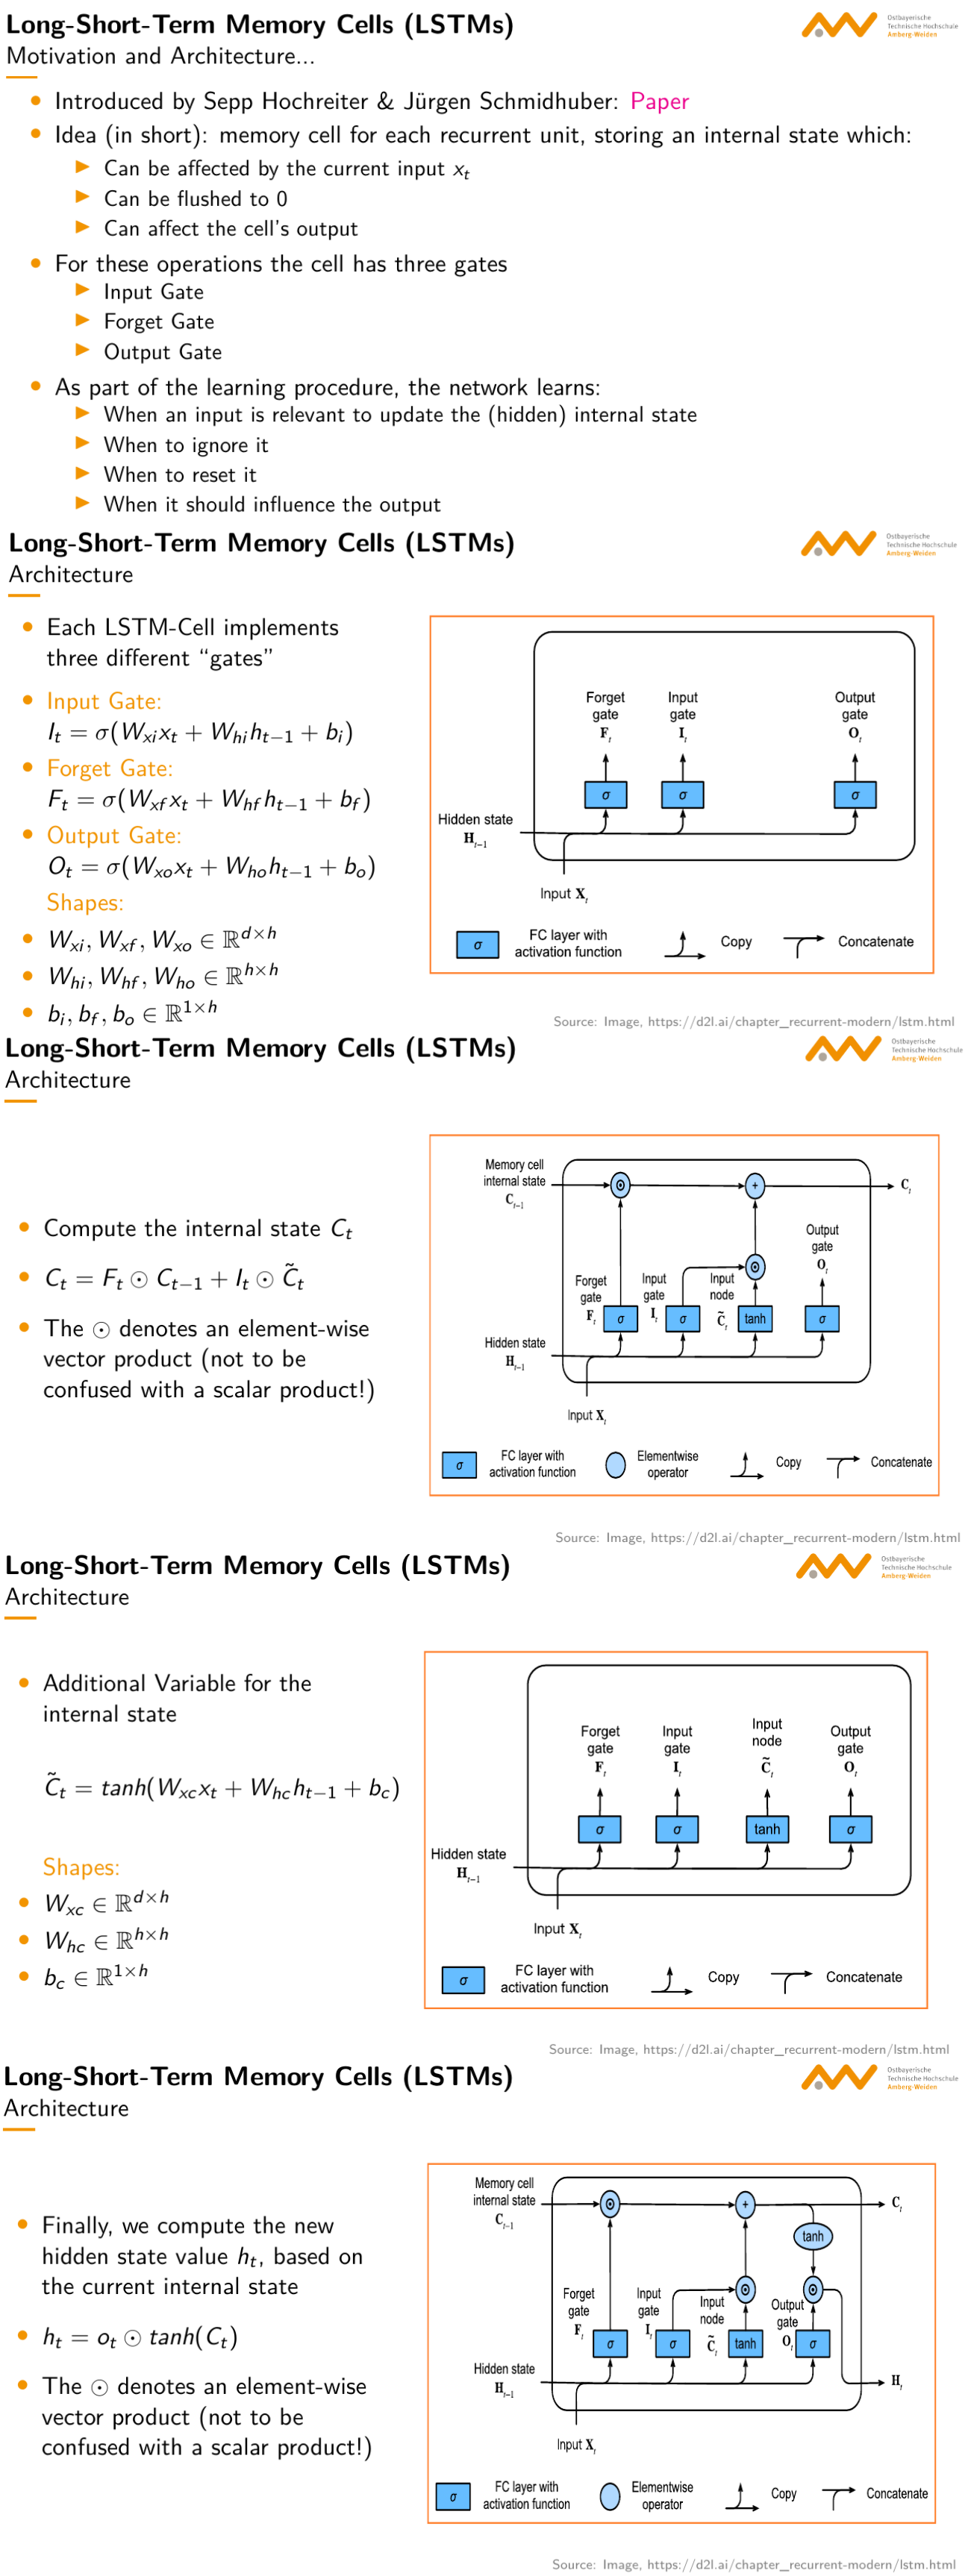

- LSTM implementation in PyTorch (`nn.LSTM`)

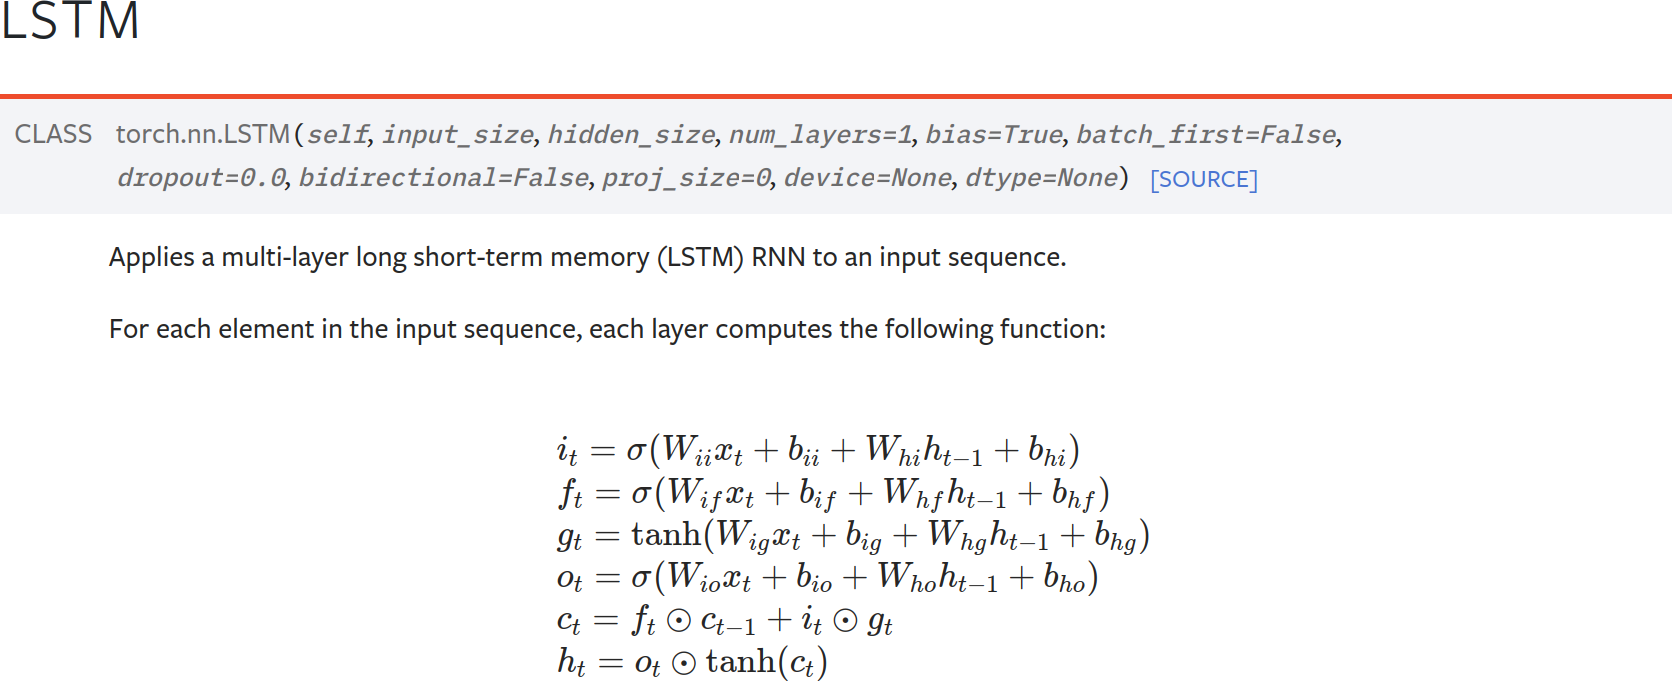

## Gated Recurrent Units (GRUs)

LSTM quickly gained popularity because of their prediction quality. However, computation times for LSTMs can be quite high. 
GRUs build on the same ideas which increasing the computational performance.

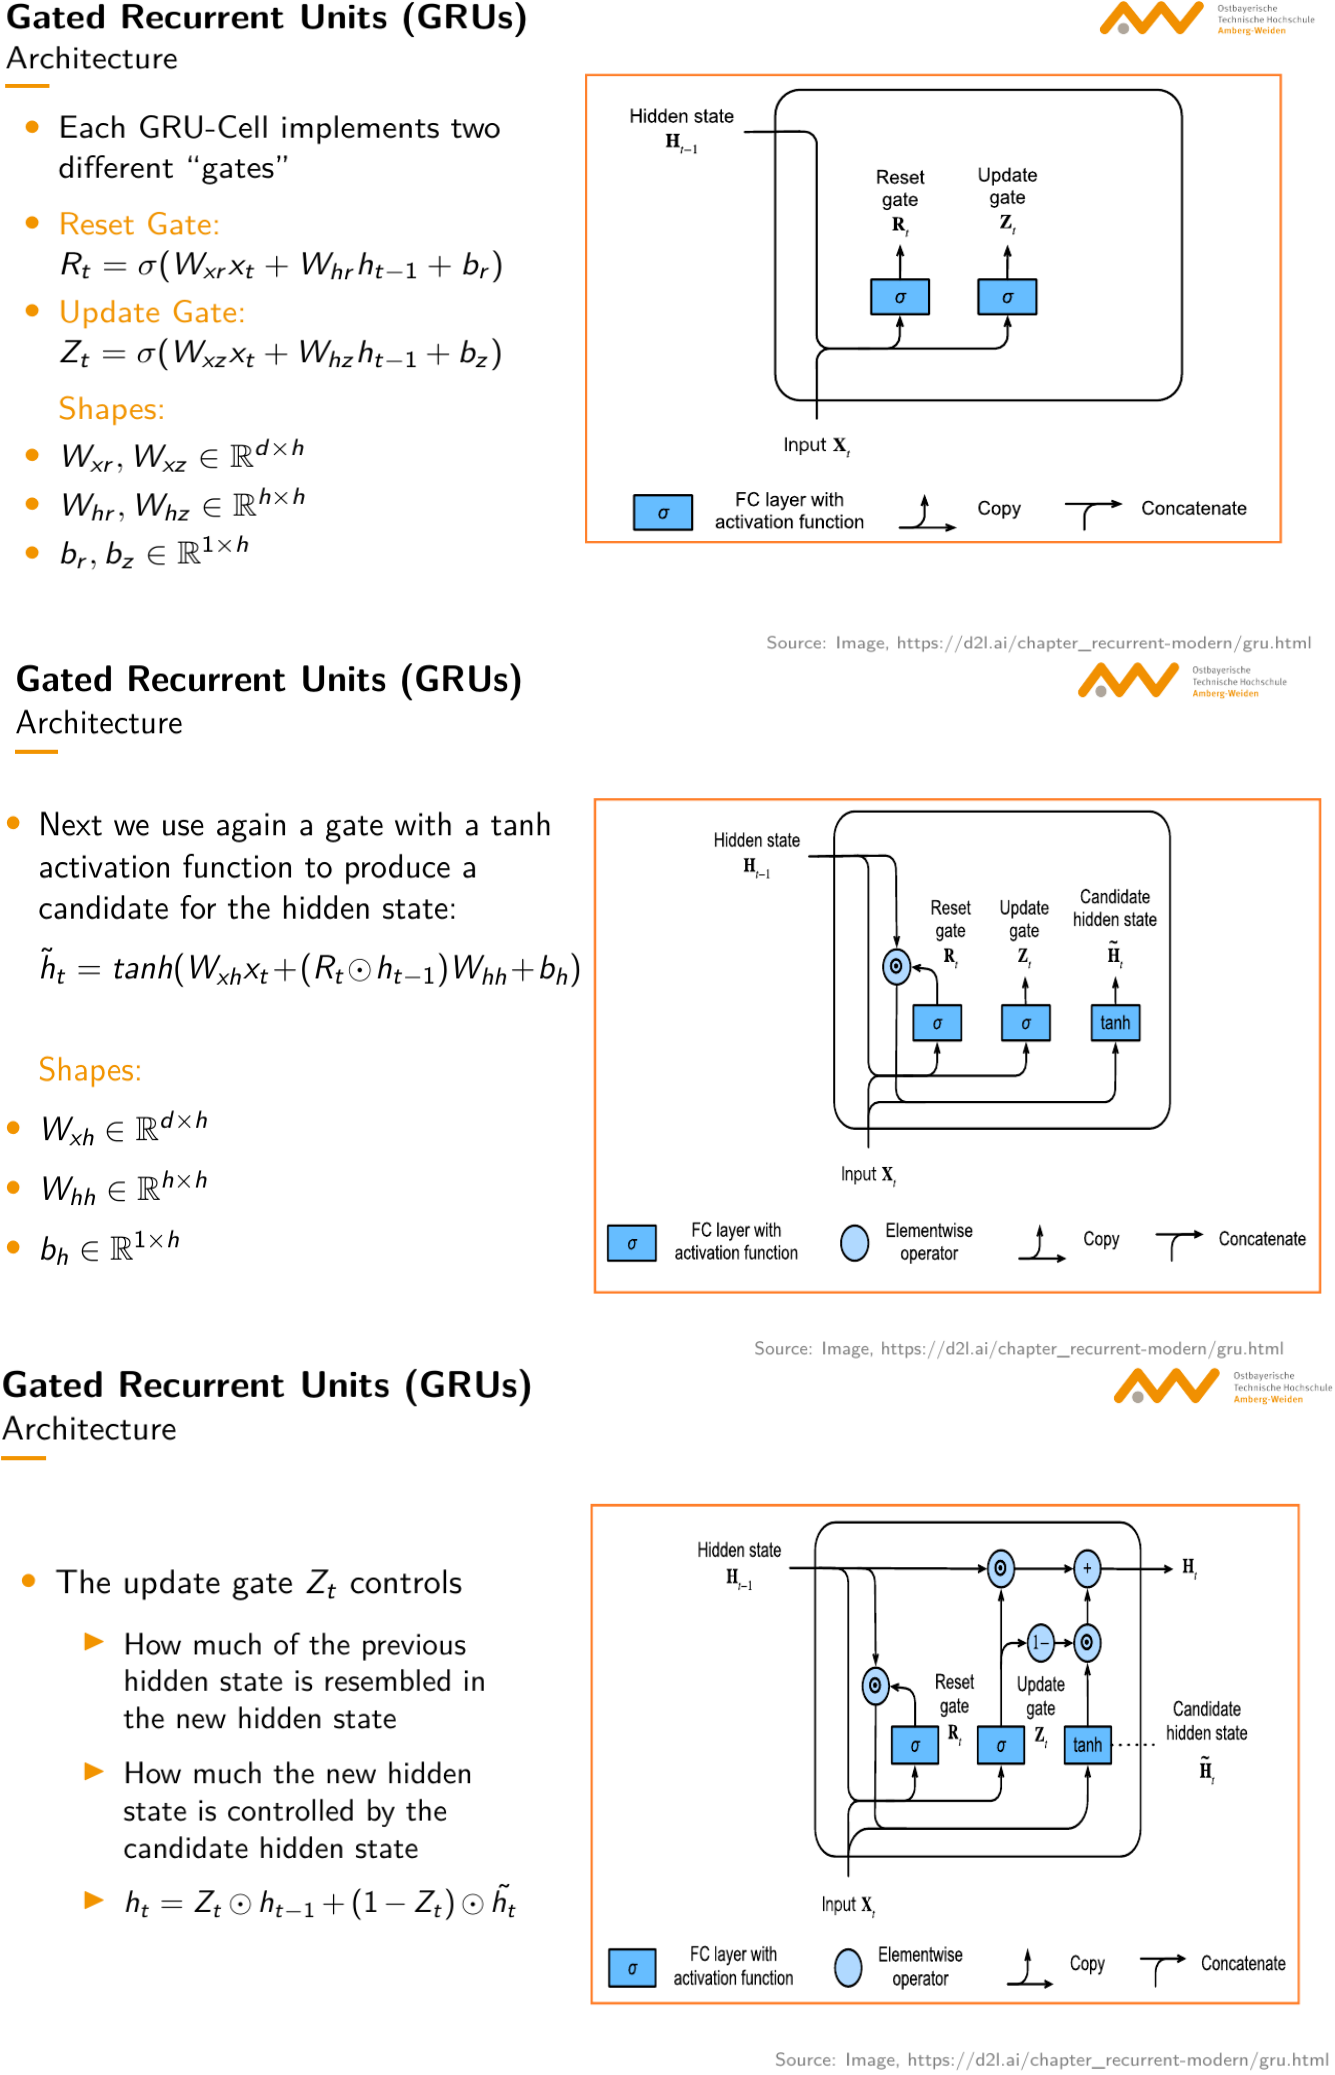

- GRU implementation in PyTorch (`nn.GRU`)

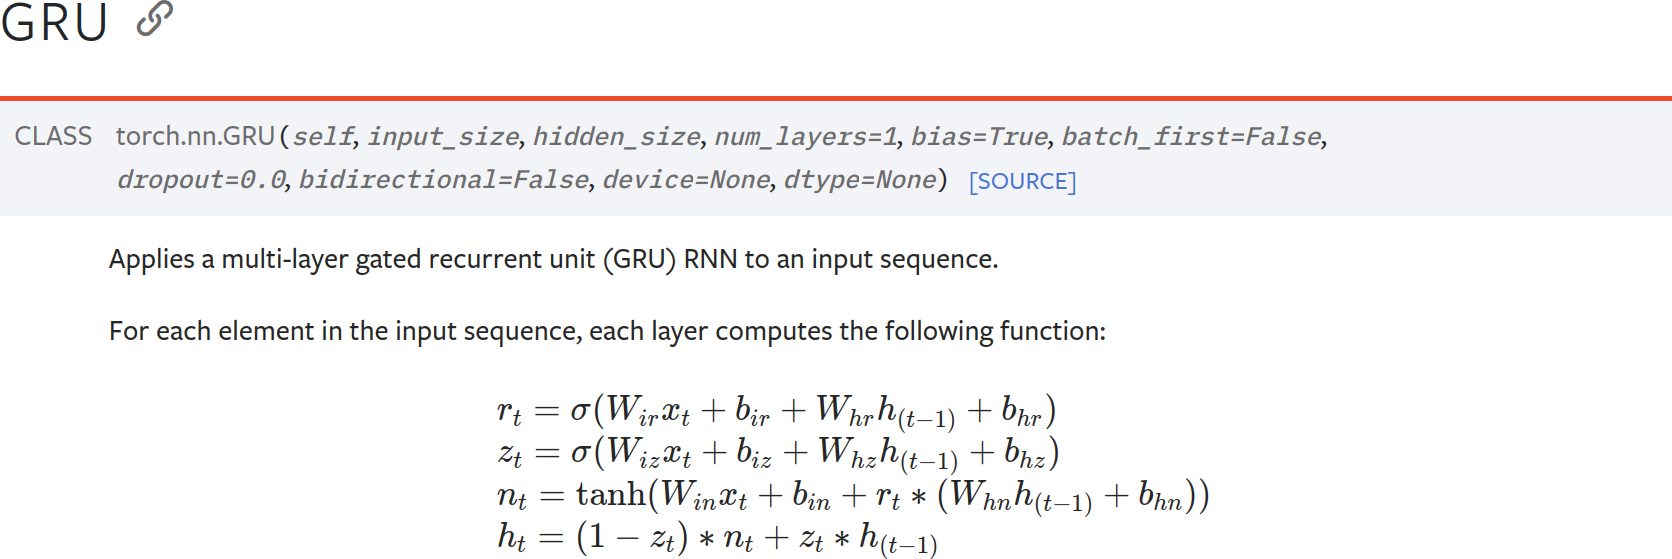

## Programming Task

### Introduction

We re-use the text from ``The Time Machine'' by H.G. Wells from the last notebook

The following code extension are required: 
- Complete and fill the missing code parts within the `MyLSTMLayer` and `MyGRULayer` implementation (add the missing lines), compared to the `RNN Layer` which you used before
- Try the `Pytorch LSTM/GRU Layer`
- Try `varying hidden layer sizes` and other `hyperparameters` of your network to get a feeling for their influence on prediction quality and runtime

### LSTM Model Architecture

- Fill the missing parts within the code skeleton (`__init__`) of the given `MyLSTMLayer` module for the `input gate`, `forget gate`, `output gate` and `internal state/node`
- Fill the missing parts within the `forward` propagation, by implementing the computations of the gate-specific outputs $I, F, O, C$, and $H$

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [3]:
class MyLSTMLayer(nn.Module):
    
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens), 
                          init_weight(num_hiddens, num_hiddens), 
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xi, self.W_hi, self.b_i = triple()  # Input gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input node
        
        
        
    def forward(self, inputs, H_C=None):
        if H_C is None:
            # Initial state with shape: (batch_size, num_hiddens)
            H = torch.zeros((inputs.shape[1], self.num_hiddens),
                          device=inputs.device)
            C = torch.zeros((inputs.shape[1], self.num_hiddens),
                          device=inputs.device)
        else:
            H, C = H_C
        
        outputs = None
        
        for X in inputs:
            I = #TODO
            F = #TODO
            O = #TODO
            C_tilde = #TODO
            C = F * C + I * C_tilde
            H = O * torch.tanh(C)
            if outputs is None:
                outputs = H
            else:
                outputs = torch.cat(outputs, H)
  
        return outputs, (H, C)

### GRU Model Architecture

- Fill the missing parts within the code skeleton (`__init__`) of the given `MyGRULayer` module for the `reset gate`, `updated gate`, and `candidate hidden state`
- Fill the missing parts within the `forward` propagation, by implementing the computations of the gate-specific outputs $Z, R, \tilde{H}$, and $H$

In [4]:
class MyGRULayer(nn.Module):
       
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        
        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xz, self.W_hz, self.b_z = triple()  # Update gate
        self.W_xr, self.W_hr, self.b_r = triple()  # Reset gate
        self.W_xh, self.W_hh, self.b_h = triple()  # Candidate hidden state
        
        
    def forward(self, inputs, H=None):
        if H is None:
            H = torch.zeros((inputs.shape[1], self.num_hiddens),
                          device=inputs.device)
        outputs = None
        
        for X in inputs:
            Z = #TODO
            R = #TODO
            H_tilde = #TODO
            
            H = Z * H + (1 - Z) * H_tilde
            
            if outputs is None:
                outputs = H
            else:
                outputs = torch.cat(outputs, H)
  
        return outputs, H

### Data Preprocessing

- Load the `time_machine.txt` data file
- Only use text information after the `String s =  *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***` and convert the remaining text information to `lower case`
- Create a sorted `set` of all the characters (`char` symobls), including punctuation marks, digits, alphabetic letters, representing the number of different `chars`
- Build two `dictonaries` - `char` to `index` versus `index` to `char`, in order to ensure fast transformations in both directions (e.g. `{"a" : 0}` vs. `{0 : "a"}`)

In [ ]:
char_to_index = #TODO
print(char_to_index)
index_to_char = #TODO
print(index_to_char)

### LSTM versus GRU
- Use the `MyLSTMLayer` as well as the `MyGRULayer`, together with the `CharRNNLSTM` and `CharRNNGRU` implementation in order to investigate the differences

In [7]:
class CharRNNLSTM(nn.Module):
    def __init__(self, input_size, emb_size, hidden_size, output_size):
        super(CharRNNLSTM, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = #TODO
        self.lstm = #TODO - your LSTM Layer
        self.fc = #TODO

    def forward(self, input, hidden):
        x = input.view(1, -1)
        x = self.embedding(x)
        output, hidden = #TODO
        output = self.fc(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), 
                torch.zeros(1, 1, self.hidden_size)) 

In [8]:
class CharRNNGRU(nn.Module):
    def __init__(self, input_size, emb_size, hidden_size, output_size):
        super(CharRNNGRU, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = #TODO
        self.gru = #TODO - your GRU Layer
        self.fc = #TODO

    def forward(self, input, hidden):
        x = input.view(1, -1)
        x = self.embedding(x)
        output, hidden = #TODO
        output = self.fc(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size) 

### Model Hyperparameter

- Define the value `input_size` and `output_size` by choosing the size of the `char set`

In [9]:
#TODO - try different values, but identical for with parameters above -> comparison reasons
mb_size = 128 #TODO
hidden_size = 64 #TODO
learning_rate = 0.1 #TODO
num_epochs = 100 #TODO
input_size = #TODO
output_size = #TODO

### Instantiate the LSTM and GRU Model

- Create the models with the mandatory input parameter: `input_size, emb_size, hidden_size, output_size`
- Define as Loss-Function the `CrossEntropyLoss`
- Specify the Optimizers by using the `Adam` option, together with the previously defined `learning rate`  

In [10]:
modellstm = #TODO 
modelgru = #TODO
criterion = #TODO
optimizerlstm = #TODO 
optimizergru = #TODO

### Training the LSTM/GRU Model via the identical training routine as for the RNN

- Train the model for a total of `500` epochs (of course you can play around with the above hyperparameters)
- Put the model into `train` mode, set the gradients to `zero`,  initialize the hidden state using the previously defined `init_hidden()` function
- Loop over the entire `training_text` sequence
- Extract the `char` at the given time step $t$ from the respective text (input)
- Extract the `char` at the next time step $t+1$ (target, ground truth) from the respective text
- Convert `char` at time point $t$ to the corresponding index, representing the model input as `pytorch tensor`
- Convert `char` at time point $t+1$ to the corresponding index, representing the model output as `pytorch tensor`
- Compute the `output` and new `hidden` representation by applying the model
- Call the `cross entropy loss`, compute the loss, and accumulate it over the entire text sequence
- Add the final loss for one epoch and the entire `training_text` size to a list for downstream visualization
- Compute `backward` propagation and call the optimizer `step` function
- Report training loss per epoch

Hint: Follow the very similar trainings routine as for the PyTorch exercie (linear regression example) and fully-connected architecture 

In [ ]:
def training(model, optimizer):
    limit = 20000 # for technical testing (whether the code runs or the output is plausible) you can limit the amount of text
    
    training_text = text[:min(len(text), limit)]
    losses = []

    for epoch in tqdm(range(num_epochs)):
        model.train()
        optimizer.zero_grad()
        hidden = model.init_hidden()
        loss = 0
    
        for char_idx in range(len(training_text) - 1):
            
            char = text[char_idx]
            
            target_char = text[char_idx+1]
            
            inp = torch.tensor([char_to_index[char]], dtype=torch.long)
            
            target = torch.tensor([char_to_index[target_char]], dtype=torch.long)
    
            output, hidden = #TODO 
    
            loss += #TODO
    
        losses.append(loss)
        
        #TODO - backpropagation and weight update
        loss.backward()
        optimizer.step()
    
        if (epoch+1) % 10 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')
    
    return losses, hidden

lstm_loss, lstm_hidden = training(modellstm, optimizerlstm)
gru_loss, gru_hidden = training(modelgru, optimizergru)

- Visualize the epoch-specific `loss values` for the `lstm` and `gru`version, as part of a `line plot`, making use of the previously stored loss information

In [ ]:
import matplotlib.pyplot as plt


### Text Generation via the trained Model
- Use the trained model to generate a sequence of chars, by starting with a `start_char` and a number of predictions (`num_predictions`) which determines the sentence length
- Put the model to the `eval` mode
- Conver the given `char` to an index, which represents the input
- Compute `num_predictions` many `char` symbols and just concatenate them
- At the end, print the final sentence - Meaningful result?

In [ ]:
start_char = 'a'
num_predictions = 300

def generate_text(model, hidden):
    
    model.eval()
    
    input = torch.tensor([char_to_index[start_char]], dtype=torch.long)
    predicted_text = start_char
    
    for _ in range(num_predictions):
        output, hidden = #TODO
        _, predicted_index = torch.max(output, 1)
        predicted_char = #TODO
        predicted_text += predicted_char
        input = predicted_index
    
    print("Generated Text: ", predicted_text)

generate_text(modellstm, lstm_hidden)
generate_text(modelgru, gru_hidden)

### Pytorch LSTM and GRU
- Instead of using the `MyLSTMLayer` and `MyGRULayer` implementation, use the `nn.LSTM` and `nn.GRU` implementation of PyTorch and also `generate_text` at the end
- Compare your `MyLSTMLayer` and `MyGRULayer` layer together with the `nn.LStM` and `nn.GRU` (visualization and text generation)

In [ ]:
class CharRNNLSTMPy(nn.Module):
    def __init__(self, input_size, emb_size, hidden_size, output_size):
        super(CharRNNLSTMPy, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = #TODO 
        self.lstm = #TODO 
        self.fc = #TODO 

    def forward(self, input, hidden):
        x = input.view(1, -1)
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        output = self.fc(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), 
                torch.zeros(1, 1, self.hidden_size)) 

In [ ]:
class CharRNNGRUPy(nn.Module):
    def __init__(self, input_size, emb_size, hidden_size, output_size):
        super(CharRNNGRUPy, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = #TODO 
        self.gru = #TODO 
        self.fc = #TODO 

    def forward(self, input, hidden):
        x = input.view(1, -1)
        x = self.embedding(x)
        output, hidden = self.gru(x, hidden)
        output = self.fc(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

In [ ]:
#TODO - try different values, but identical for with parameters above -> comparison reasons
emb_size = #TODO
hidden_size = #TODO

learning_rate = num_epochs = #TODO
input_size = #TODO
output_size = #TODO

In [ ]:
modellstmpy = #TODO
modelgrupy = #TODO
criterion = #TODO 
optimizerlstm = #TODO 
optimizergru = #TODO 

In [ ]:
lstmpy_loss, lstmpy_hidden = #TODO
grupy_loss, grupy_hidden = #TODO

In [ ]:
import matplotlib.pyplot as plt
#TODO

In [ ]:
generate_text(modellstmpy, lstmpy_hidden)
generate_text(modelgrupy, grupy_hidden)

## Other, more improved and sophisticated ideas
- Remove text limit
- Use a learning rate scheduler
- Do hyperparameter tuning
- Try several `LSTM/GRU` layers in a row
- Use more than one letter as training context 
- Early Stopping
- Training, Validation, Test Split